<a href="https://colab.research.google.com/github/biswaroop1547/pytorch_tests/blob/master/small_resnet_4_90acc_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

rgb_mean = (0.4914, 0.4822, 0.4465)
rgb_std = (0.2023, 0.1994, 0.2010)

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(size=32, padding=4),
        transforms.ToTensor(),
        # transforms.Normalize((0.5,), (0.5,))
        transforms.Normalize(rgb_mean, rgb_std)
    ]
)

test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize((0.5,), (0.5,))
        transforms.Normalize(rgb_mean, rgb_std)
    ]
)



# trainset = torchvision.datasets.EMNIST(root='../data/EMNIST_LETTERS',
trainset = torchvision.datasets.CIFAR10(root='../data/CIFAR10',
                                       train = True,
                                        # split = 'letters',
                                      #  download = True,
                                        download = False,
                                       transform = train_transform)


testset = torchvision.datasets.CIFAR10(root='../data/CIFAR10', 
# testset = torchvision.datasets.EMNIST(root='../data/EMNIST_LETTERS',
                                      train = False,
                                      #  split = 'letters',
                                      # download = True,
                                       download = False,
                                      transform = test_transform)

trainloader = torch.utils.data.DataLoader(trainset, 
                                         batch_size=32, 
                                         shuffle = True, 
                                         num_workers=4)


testloader = torch.utils.data.DataLoader(testset, 
                                        batch_size=32, 
                                        shuffle = False, 
                                        num_workers = 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# classes = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


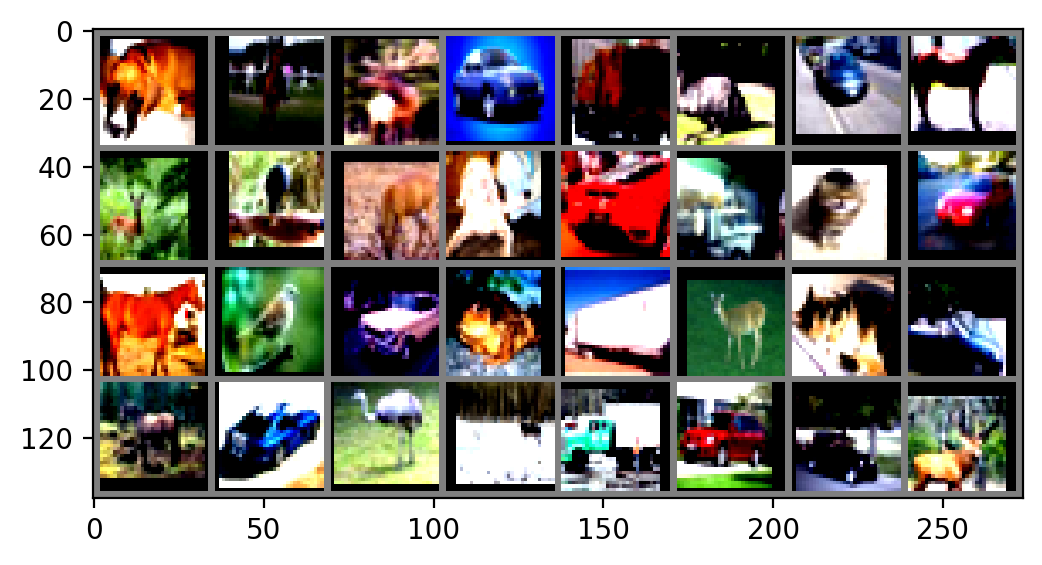

     dog    horse     deer      car    truck     bird      car    horse     deer     bird     deer      dog      car    truck      cat      car    horse     bird      car     frog    truck     deer      cat      car    horse      car     bird     deer    truck      car      car     deer


In [147]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(num=None, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
imgs, labels = dataiter.next()
# labels = labels - 1
imshow(torchvision.utils.make_grid(imgs))
print(' '.join('%8s' % classes[labels[i]] for i in range(len(labels))))

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [87]:
imgs.size()

torch.Size([32, 3, 32, 32])

In [159]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.b1conv1 = nn.Conv2d(3, 32, 3, stride = 1, padding = 1)
    self.batchnorm_b11 = nn.BatchNorm2d(32)
    self.b1conv2 = nn.Conv2d(32, 32, 3, stride = 1, padding = 1)
    self.b1conv3 = nn.Conv2d(32, 32, 3, stride = 1, padding = 1)
    self.batchnorm_b13 = nn.BatchNorm2d(32)
    self.b1conv4 = nn.Conv2d(32, 32, 3, stride = 1, padding = 1)
    self.b1conv5 = nn.Conv2d(32, 32, 3, stride = 1, padding = 1)
    
    self.b1conv6 = nn.Conv2d(32, 64, 3, stride = 2, padding = 1)
    self.residual_conv12 = nn.Conv2d(32, 64, 3, stride = 2, padding = 1)

    self.b2conv1 = nn.Conv2d(64, 64, 3, stride = 1, padding = 1)
    self.batchnorm_b21 = nn.BatchNorm2d(64)
    self.b2conv2 = nn.Conv2d(64, 64, 3, stride = 1, padding = 1)
    self.b2conv3 = nn.Conv2d(64, 64, 3, stride = 1, padding = 1)
    self.batchnorm_b23 = nn.BatchNorm2d(64)
    self.b2conv4 = nn.Conv2d(64, 64, 3, stride = 1, padding = 1)

    self.b2conv5 = nn.Conv2d(64, 128, 3, stride = 2, padding = 1)
    self.residual_conv23 = nn.Conv2d(64, 128, 3, stride = 2, padding = 1)
    
    self.b3conv1 = nn.Conv2d(128, 128, 3, stride = 1, padding = 1)
    self.batchnorm_b31 = nn.BatchNorm2d(128)
    self.b3conv2 = nn.Conv2d(128, 128, 3, stride = 1, padding = 1)
    self.b3conv3 = nn.Conv2d(128, 128, 3, stride = 1, padding = 1)
    self.batchnorm_b33 = nn.BatchNorm2d(128)
    self.b3conv4 = nn.Conv2d(128, 128, 3, stride = 1, padding = 1)

    self.b3conv5 = nn.Conv2d(128, 256, 3, stride = 2, padding = 1)
    self.residual_conv34 = nn.Conv2d(128, 256, 3, stride = 2, padding = 1)
    
    self.b4conv1 = nn.Conv2d(256, 256, 3, stride = 1, padding = 1)
    self.batchnorm_b41 = nn.BatchNorm2d(256)
    self.b4conv2 = nn.Conv2d(256, 256, 3, stride = 1, padding = 1)
    self.b4conv3 = nn.Conv2d(256, 256, 3, stride = 1, padding = 1)
    self.batchnorm_b43 = nn.BatchNorm2d(256)
    self.b4conv4 = nn.Conv2d(256, 256, 3, stride = 1, padding = 1)

    # self.long_residual_conv = nn.Conv2d(32, 64, 3, stride = 2, padding = 1)
    # self.avg_pool = nn.AvgPool2d(8)

    self.fc1 = nn.Linear(256*4*4, 128)
    self.batchnorm_fc1 = nn.BatchNorm1d(256*4*4)
    # self.dropout1 = nn.Dropout(0.1)
    self.fc2 = nn.Linear(128, 10)
    self.batchnorm_fc2 = nn.BatchNorm1d(128)
    # self.dropout2 = nn.Dropout(0.05)

  def forward(self, image):
    x_11 = F.relu(self.batchnorm_b11(self.b1conv1(image)))
    x_12 = F.relu(self.b1conv2(x_11))
    x_13 = self.batchnorm_b13(F.relu(self.b1conv3(x_12)) + x_11) #first residual connection
    x_14 = F.relu(self.b1conv4(x_13))
    x_15 = F.relu(self.b1conv5(x_14)) + x_13 #second residual connection

    x_16 = F.relu(self.b1conv6(x_15))

    x_21 = F.relu(self.batchnorm_b21(self.b2conv1(x_16))) + self.residual_conv12(x_15) #third residual connection
    x_22 = F.relu(self.b2conv2(x_21)) 
    x_23 = self.batchnorm_b23(F.relu(self.b2conv3(x_22)) + x_21) #fourth residual connection
    x_24 = F.relu(self.b2conv4(x_23))

    x_25 = F.relu(self.b2conv5(x_24)) + self.residual_conv23(x_23) #fifth residual connection

    x_31 = F.relu(self.batchnorm_b31(self.b3conv1(x_25)))
    x_32 = F.relu(self.b3conv2(x_31)) + x_25 #sixth residual connection
    x_33 = self.batchnorm_b33(F.relu(self.b3conv3(x_32)))
    x_34 = F.relu(self.b3conv4(x_33)) + x_32 #seventh residual connection
    
    x_35 = F.relu(self.b3conv5(x_34)) + self.residual_conv34(x_33) #eighth residual connection
    # print("here")
    x_41 = F.relu(self.batchnorm_b41(self.b4conv1(x_35)))
    x_42 = F.relu(self.b4conv2(x_41)) + x_35 #ninth residual connection
    x_43 = self.batchnorm_b43(F.relu(self.b4conv3(x_42)))
    x_44 = F.relu(self.b4conv4(x_43)) + x_42 #tenth residual connecti

    # pooled = self.avg_pool(x_32)

    flattened = F.relu(self.batchnorm_fc1(x_44.view(x_44.size()[0], -1)))
    # fc1 = self.dropout(F.relu(self.batchnorm_fc(self.fc1(flattened))))
    fc1 = F.relu(self.fc1(flattened))
    fc2 = self.fc2(self.batchnorm_fc2(fc1))
    # print(fc.size())
    return fc2


net = Net()
net.to(device)

Net(
  (b1conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm_b11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b1conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b1conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm_b13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b1conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b1conv5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b1conv6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (residual_conv12): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (b2conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm_b21): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 

In [88]:
# net(torch.randn(16, 3, 32, 32).to(device)).size()
# # labels.size()
# int(len(trainloader) * 0.90)
# num = 0
# training_data = []
# validation_data = []
# for data in trainloader:
#   if num > int(len(trainloader) * 0.9):
#     validation_data.append(data)
#     num += 1
#     continue
#   training_data.append(data)
#   num += 1
# len(trainloader)

1563

In [71]:
# len(validation_data) - 312
# len(training_data) - 2813

2813

In [113]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

Epoch - 1 | Learning rate - 0.001
Loss - 1.8793113738298417 Batches_passed : 200
Loss - 1.6719512099027634 Batches_passed : 600
Loss - 1.577920807003975 Batches_passed : 1200
Loss - 1.4763773334026338 Batches_passed : 2000
Loss - 1.3773816528916358 Batches_passed : 3000
Loss - 1.3186789298057555 Batches_passed : 4200
Loss - 1.2289810368418694 Batches_passed : 5600
Train acc for 50000 images : 46.178
Test acc for 10000 images : 60.74
Test loss for 10000 images : 1.0772274406954123
Epoch - 2 | Learning rate - 0.000980392156862745
Loss - 1.1366823104023933 Batches_passed : 200
Loss - 1.0627870947122573 Batches_passed : 600
Loss - 1.0294447335600854 Batches_passed : 1200
Loss - 1.0067921230196952 Batches_passed : 2000
Loss - 0.9710296568274498 Batches_passed : 3000
Loss - 0.9451544415950776 Batches_passed : 4200
Loss - 0.8995820769667625 Batches_passed : 5600
Train acc for 50000 images : 64.762
Test acc for 10000 images : 72.32
Test loss for 10000 images : 0.7950854052941259
Epoch - 3 | Le

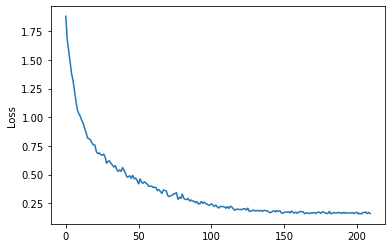

In [160]:
from tqdm import tqdm
learning_rate = 0.001
decay_rate = 0.08
loss_track = []
for epoch in range(30):
    
    correct = 0
    total = 0
    running_loss = 0.0
    batch_count = 0
    i = 0

    learning_rate = learning_rate / (1 + (decay_rate*epoch/4))
    optimizer = optim.Adam(net.parameters(), lr = learning_rate)
    print(f"Epoch - {epoch + 1} | Learning rate - {learning_rate}")
    for (inputs, labels) in trainloader:
    # for (inputs, labels) in training_data:
        net.train()
        inputs, labels = inputs.to(device), labels.to(device)
    
        net.zero_grad()
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        
        net.eval()
        with torch.no_grad():
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        running_loss += loss.item()
        if i % 200 == 199:
            batch_count += 1 + i
            batch_loss = running_loss/200
            loss_track.append(batch_loss)
            print(f"Loss - {batch_loss} Batches_passed : {batch_count}")
            running_loss = 0.0
            
        i += 1
    print(f"Train acc for {total} images : {correct * 100 / total}")
    
    correct = 0
    total = 0
    total_loss = 0
    total_loss_count = 0

    net.eval()
    with torch.no_grad():
        for data in testloader:
        # for data in validation_data:
            images, labels = data[0].to(device), data[1].to(device)
            # images, labels = data

            outputs = net(images)
            val_loss = loss_fn(outputs, labels)
            total_loss += val_loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_loss_count +=1
            correct += (predicted == labels).sum().item()

    print(f"Test acc for {total} images : {correct * 100 / total}")
    print(f"Test loss for {total} images : {total_loss / total_loss_count}")

    
import matplotlib.pyplot as plt
plt.plot(loss_track)
plt.ylabel("Loss")
plt.show()

In [162]:
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i, label in enumerate(labels):
            class_correct[label] += c[i]
            class_total[label] += 1
    
    for i in range(len(classes)):
        print(f"Accuracy of {classes[i]} (samples: {class_total[i]}) : {class_correct[i] * 100 / class_total[i]}")

100%|██████████| 313/313 [00:03<00:00, 80.36it/s]

Accuracy of plane (samples: 1000.0) : 90.60000610351562
Accuracy of car (samples: 1000.0) : 96.30000305175781
Accuracy of bird (samples: 1000.0) : 87.30000305175781
Accuracy of cat (samples: 1000.0) : 75.30000305175781
Accuracy of deer (samples: 1000.0) : 88.60000610351562
Accuracy of dog (samples: 1000.0) : 86.50000762939453
Accuracy of frog (samples: 1000.0) : 91.60000610351562
Accuracy of horse (samples: 1000.0) : 92.30000305175781
Accuracy of ship (samples: 1000.0) : 95.30000305175781
Accuracy of truck (samples: 1000.0) : 93.4000015258789
